<a href="https://colab.research.google.com/github/AfrizalDS/PCVK_Ganjil_2021/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

*   ## **Nama : Afrizal Dwi Septian**
*   ## **NIM : 2241720122**
*   ## **Kelas : TI-3A**





1.   Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
2.   Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.




3.   Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

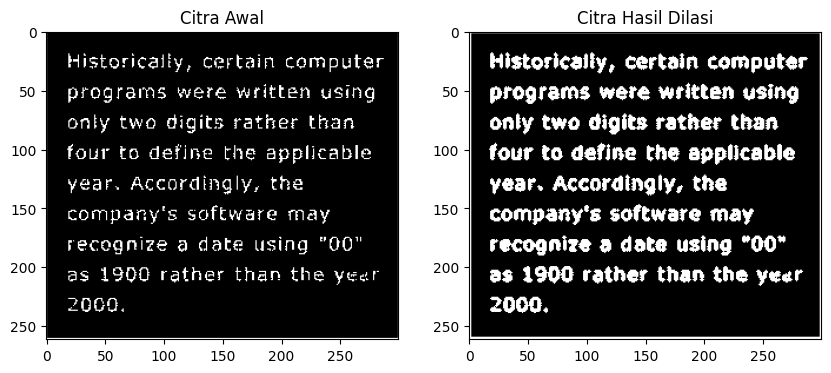

In [ ]:
# Fungsi untuk melakukan dilasi manual dengan SED cross 3x3
def dilasi_manual(image):
    # Structuring Element Dilasi (cross 3x3)
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Padding citra untuk menghindari error di tepi
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    # Membuat citra hasil dilasi yang kosong
    result_image = np.zeros_like(image)

    # Ukuran SED
    rows, cols = image.shape

    # Melakukan dilasi
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            # Memeriksa neighborhood sesuai dengan SED
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            # Jika ada elemen 1 pada neighborhood yang sesuai dengan SED, set piksel menjadi 1
            if np.any(neighborhood[SED == 1]):
                result_image[i-1, j-1] = 255

    return result_image

# Membaca citra yang diunggah
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/morphology.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Melakukan dilasi manual
dilated_image = dilasi_manual(binary_image)

# Menampilkan citra awal dan hasil dilasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

4.   Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)


Structuring Element (SED):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


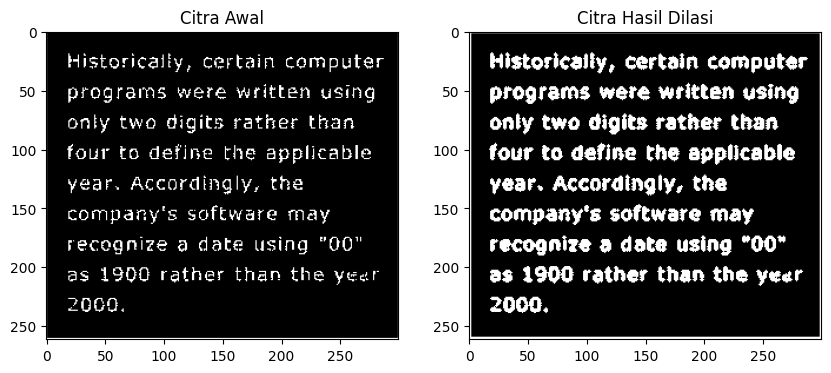

In [ ]:
# Membaca citra input
image_path = '//content/drive/MyDrive/PCVK_IMAGE/images/Images/morphology.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("Structuring Element (SED):\n", kernel)

# Melakukan dilasi menggunakan structuring element
dilated_image = cv2.dilate(binary_image, kernel)

# Menampilkan citra awal dan hasil dilasi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

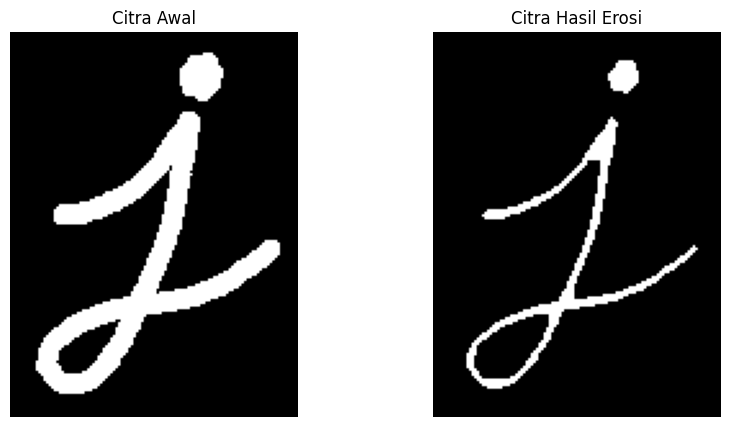

In [ ]:
# Fungsi untuk melakukan erosi manual dengan SE square 5x5
def erosi_manual(image):
    # Structuring Element (SE) berbentuk square 5x5
    SE = np.ones((5, 5), dtype=np.uint8)

    # Padding citra untuk menghindari error di tepi
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant', constant_values=0)

    # Membuat citra hasil erosi yang kosong
    result_image = np.zeros_like(image)

    # Ukuran citra
    rows, cols = image.shape

    # Melakukan erosi
    for i in range(2, rows+2):
        for j in range(2, cols+2):
            # Memeriksa neighborhood sesuai dengan SE
            neighborhood = padded_image[i-2:i+3, j-2:j+3]
            # Jika semua elemen neighborhood sesuai dengan SE (hanya piksel putih/255), set piksel menjadi 255
            if np.all(neighborhood[SE == 1] == 255):
                result_image[i-2, j-2] = 255

    return result_image

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/j.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Melakukan erosi manual
eroded_image = erosi_manual(binary_image)

# Menampilkan citra awal dan hasil erosi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Citra Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


6.   Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)



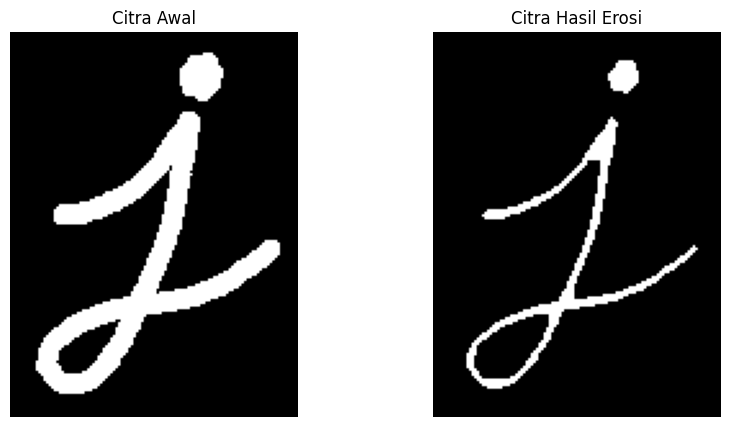

In [ ]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/j.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan erosi menggunakan structuring element
eroded_image = cv2.erode(binary_image, kernel)

# Menampilkan citra awal dan hasil erosi
plt.figure(figsize=(10, 5))

# Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')  # Menyembunyikan koordinat

# Citra Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')  # Menyembunyikan koordinat

plt.show()



7.   Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)





**Tanpa Library**

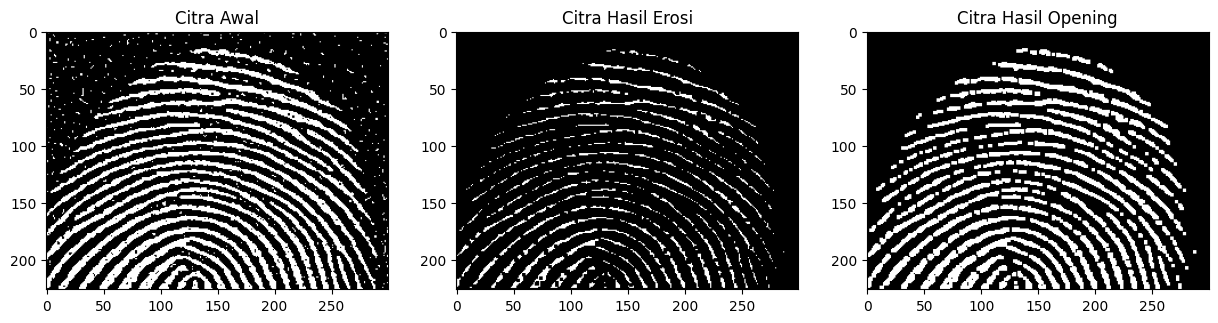

In [ ]:

# Fungsi untuk erosi manual
def erosi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.min(region * SE)
    return output

# Fungsi untuk dilasi manual
def dilasi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.max(region * SE)
    return output

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
SE = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Melakukan operasi opening: erosi lalu dilasi
eroded_image = erosi_manual(binary_image, SE)
opened_image = dilasi_manual(eroded_image, SE)

# Menampilkan citra awal, hasil erosi, dan hasil opening
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')


# Citra Hasil Erosi
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')


# Citra Hasil Opening
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')


plt.show()

**Dengan Library**

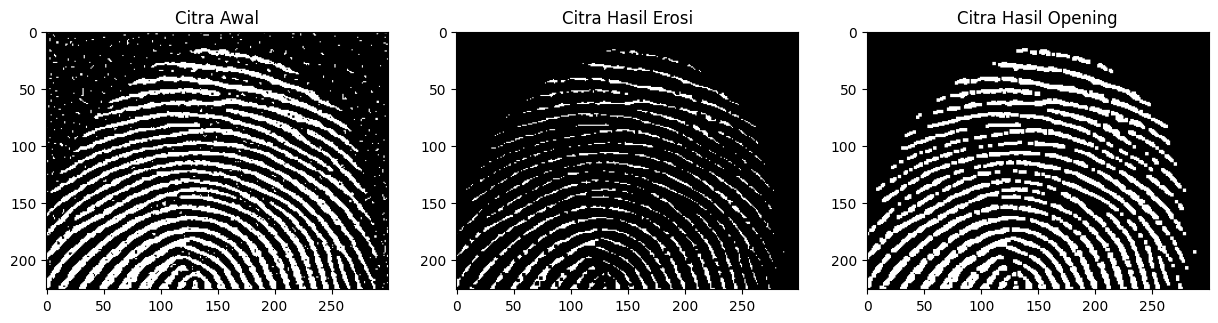

In [ ]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi opening menggunakan OpenCV
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Menampilkan citra awal dan hasil opening
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Erosi (menggunakan OpenCV)
eroded_image = cv2.erode(binary_image, kernel)
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

# Citra Hasil Opening
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()



8.   Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


**Tanpa Library**

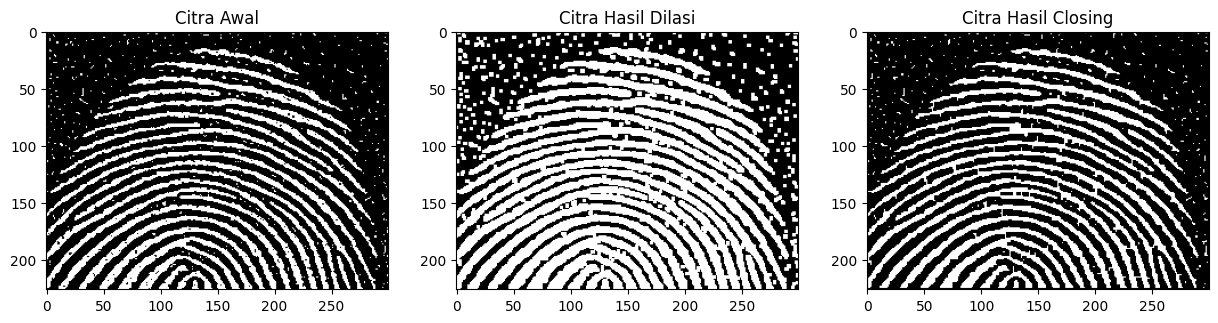

In [ ]:
# Fungsi untuk dilasi manual
def dilasi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.max(region * SE)
    return output

# Fungsi untuk erosi manual
def erosi_manual(image, SE):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.min(region * SE)
    return output

# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
SE = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Melakukan operasi closing: dilasi lalu erosi
dilated_image = dilasi_manual(binary_image, SE)
closed_image = erosi_manual(dilated_image, SE)

# Menampilkan citra awal, hasil dilasi, dan hasil closing
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Citra Hasil Closing
plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

**Dengan Library**

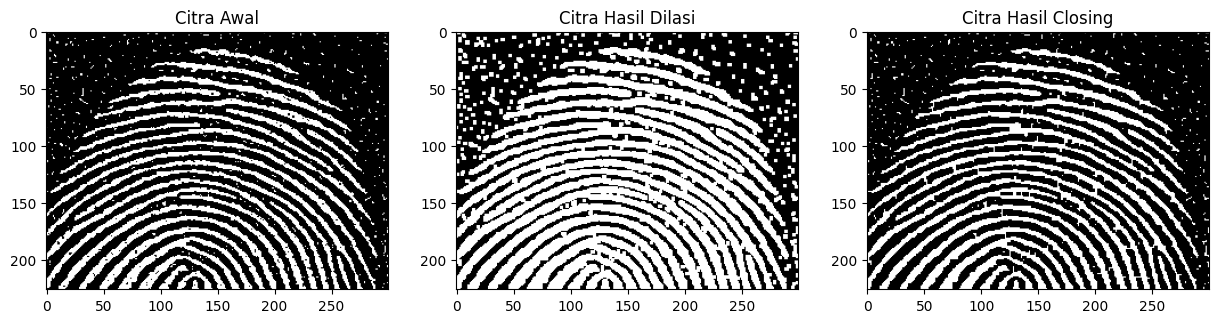

In [ ]:
# Membaca citra input
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk membuat citra biner
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat structuring element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi closing menggunakan OpenCV
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Menampilkan citra awal dan hasil closing
plt.figure(figsize=(15, 5))

# Citra Awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

# Citra Hasil Dilasi (menggunakan OpenCV)
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Citra Hasil Closing
plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()


12.   List item
 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)



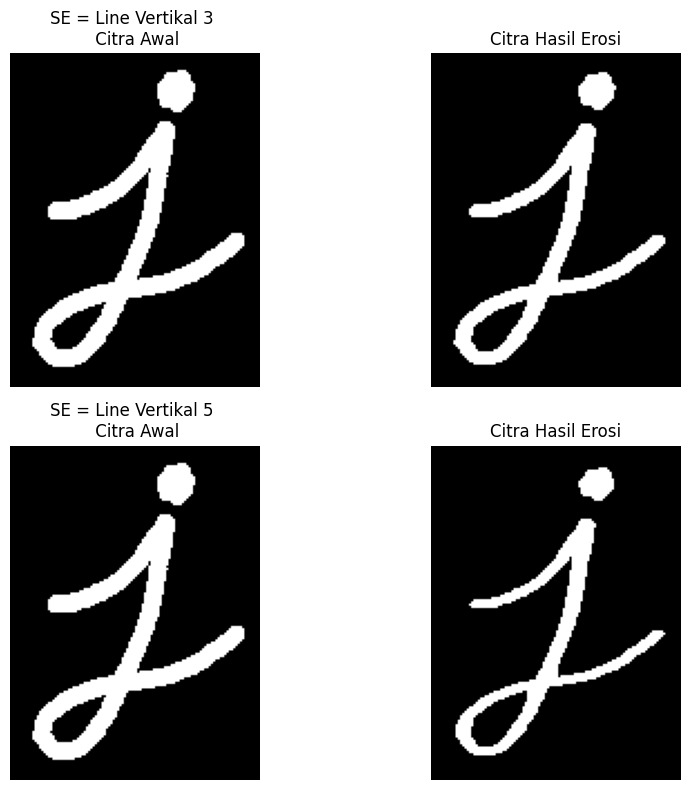

In [26]:

# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK_IMAGE/images/Images/j.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat structuring element (elemen struktur) berbentuk garis vertikal
kernel_3 = np.ones((3, 1), np.uint8)
kernel_5 = np.ones((5, 1), np.uint8)

# Menerapkan operasi erosi
erosion_3 = cv2.erode(image, kernel_3)
erosion_5 = cv2.erode(image, kernel_5)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(10, 8))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

plt.subplot(2, 2, 1)  # Subplot untuk citra awal kernel 3x1
plt.title('SE = Line Vertikal 3 \n Citra Awal', fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)  # Subplot untuk citra hasil erosi kernel 3x1
plt.title('Citra Hasil Erosi', fontsize=12)
plt.imshow(erosion_3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)  # Subplot untuk citra awal kernel 5x1
plt.title('SE = Line Vertikal 5 \n Citra Awal', fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)  # Subplot untuk citra hasil erosi kernel 5x1
plt.title('Citra Hasil Erosi', fontsize=12)
plt.imshow(erosion_5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()